# Imports

In [1]:
from NNTrainer import NNTrainer
from plotter import Plotter
import numpy as np
from dataloader import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the data to numpy arrays

In [2]:
dataloader = DataLoader()

df_X_train, df_y_train, df_X_val, df_y_val, df_X_test, df_y_test = dataloader.load_data()

df_X_train = df_X_train.drop("noise", axis = 1)
df_X_val = df_X_val.drop("noise", axis = 1)
df_X_test = df_X_test.drop("noise", axis = 1)

X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()

X_val = df_X_val.to_numpy()
y_val = df_y_val.to_numpy()

X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

N_train = X_train.shape[0]

print("Number of training samples = {}".format(N_train))

Number of training samples = 336


In [3]:
#Perform z-scale normalization on last two continous features.
def normalize(X):
    scaler = StandardScaler()
    N = X.shape[0]
    D = X.shape[1]
    X[:, D-1] = scaler.fit_transform(X[:, D-1].reshape(-1, 1)).reshape((N,))
    X[:, D-2] = scaler.fit_transform(X[:, D-2].reshape(-1, 1)).reshape((N,))

normalize(X_train)
normalize(X_val)
normalize(X_test)

D = X_train.shape[1]

# Load plotter

In [4]:
plotter = Plotter()

# Train the model

In [5]:
trainer = NNTrainer()
D = X_train.shape[1]
print("D = {}".format(D))

hidden_size = 16

trained_model = trainer.train_regression_model_with_validation(X_train, y_train, X_val, y_val, D, hidden_size)
num_params = trained_model.count_parameters()
print(f"Total number of parameters: {num_params}")

D = 10
Device = cuda
Number of epochs = 600
Epoch 1/600, Train Loss: 21.162899198986235
Epoch 1/600, Validation R^2: -11.065118724779085, Validation RMSE: 4.840787275797954


Epoch 2/600, Train Loss: 21.0039796375093
Epoch 2/600, Validation R^2: -10.916860012327698, Validation RMSE: 4.810953034857


Epoch 3/600, Train Loss: 20.89254333859398
Epoch 3/600, Validation R^2: -10.832013154135923, Validation RMSE: 4.7937956870636205


Epoch 4/600, Train Loss: 20.760645094371977
Epoch 4/600, Validation R^2: -10.807092178771795, Validation RMSE: 4.788744600877607


Epoch 5/600, Train Loss: 20.654563903808594
Epoch 5/600, Validation R^2: -10.651020356277334, Validation RMSE: 4.75698934820261


Epoch 6/600, Train Loss: 20.429146539597284
Epoch 6/600, Validation R^2: -10.585227903964324, Validation RMSE: 4.743539149316535


Epoch 7/600, Train Loss: 20.327329726446244
Epoch 7/600, Validation R^2: -10.455827579178896, Validation RMSE: 4.716973459690236


Epoch 8/600, Train Loss: 20.169007301330566
E

R2 = 0.9679809392532847
RMSE = 0.2447366679928805


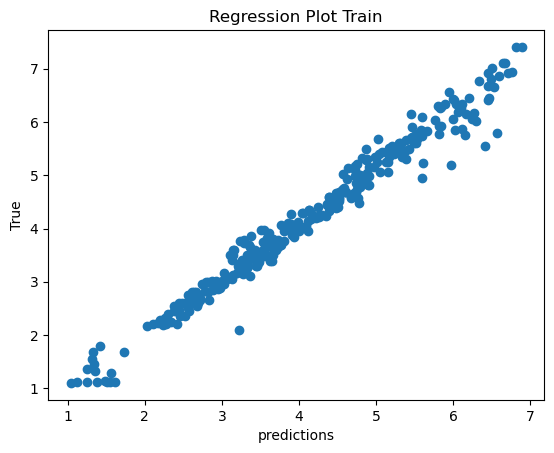

In [6]:
train_true = y_train
train_preds = trained_model.predict(X_train)
R2 = r2_score(y_true = train_true, y_pred = train_preds)
rmse = np.sqrt(mean_squared_error(train_true, train_preds))
plotter.scatter_plot(train_preds, train_true, "Regression Plot Train", x_axis = "predictions", y_axis = "True")
print("R2 = {}".format(R2))
print("RMSE = {}".format(rmse))

R2 = 0.9613638423406461
RMSE = 0.273934773709925


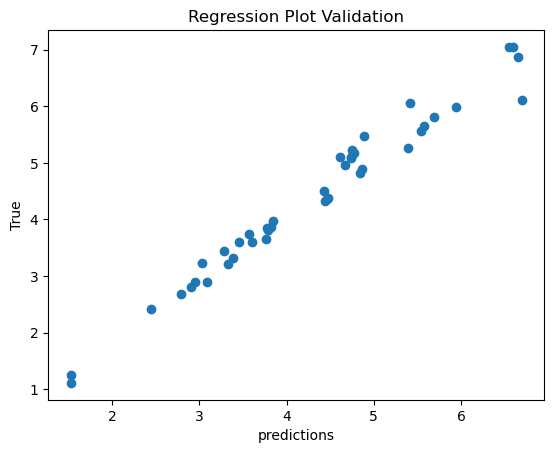

In [7]:
val_true = y_val
val_preds = trained_model.predict(X_val)
R2 = r2_score(y_true = val_true, y_pred = val_preds)
rmse = np.sqrt(mean_squared_error(val_true, val_preds))
plotter.scatter_plot(val_preds, val_true, "Regression Plot Validation", x_axis = "predictions", y_axis = "True")
print("R2 = {}".format(R2))
print("RMSE = {}".format(rmse))

R2 = 0.9730180494432158
RMSE = 0.2421193183958844


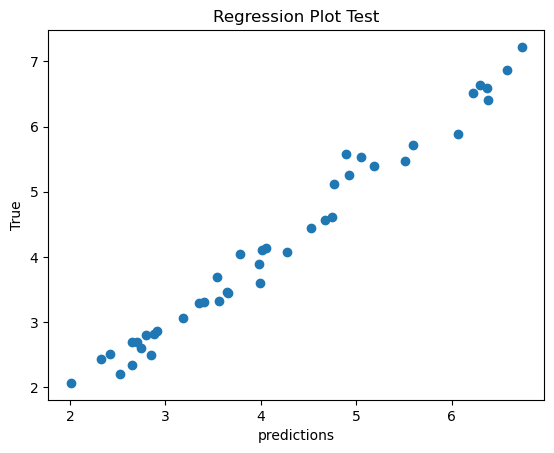

In [8]:

test_true = y_test
test_preds = trained_model.predict(X_test)
R2 = r2_score(y_true = test_true, y_pred = test_preds)
rmse = np.sqrt(mean_squared_error(test_true, test_preds))
plotter.scatter_plot(test_preds, test_true, "Regression Plot Test", x_axis = "predictions", y_axis = "True")
print("R2 = {}".format(R2))
print("RMSE = {}".format(rmse))